## This file perform a mini-benchmark of the execution time of the stackedclasses.

In [1]:
import sys
from os import path
import time
sys.path.append(path.dirname(path.dirname(path.abspath("Test.ipynb"))))
from Controllers_Definition import testcontroller1, testcontroller2, testcontroller3, testcontroller4
from fmlc.triggering import triggering
from fmlc.baseclasses import eFMU
from fmlc.stackedclasses import controller_stack
import matplotlib.pyplot as plt

Note: Each controller is in a seperate task.

In [2]:
run_time = []
num_controllers_list = range(5, 76, 5)
#num_controllers_list = [30]
for num_controllers in num_controllers_list:
    # Init
    print(num_controllers)
    controllers = {}
    mapping = {}
    for i in range(num_controllers):
        controllers['controller%s' % i] = {'function': testcontroller1, 'sampletime': 0.25}
        mapping['controller%s_a' % i] = 10
        mapping['controller%s_b' % i] = 4
    ctrl_stack = controller_stack(controllers, mapping, tz=-8, debug=False,
                                  parallel=True, timeout=2, workers=200)
    print('Finished Initialization')
    # Call query_control 6 times
    start_time = time.time()
    for i in range(6):
        ctrl_stack.query_control(time.time())
        # Sleep can be necessary since the run time can be less than the sample time. 
        time.sleep(0.3)
    # Note I subtract the total sleep time from the final run time. 
    print('Done')
    run_time.append(time.time()-start_time)
    ctrl_stack.shutdown()
    print('Shutdown complete')

5
Finished Initialization
Done
Closing pythonDB for Zone1.
Shutdown complete
10


Killed


Finished Initialization
Done
Closing pythonDB for Zone1.
Shutdown complete
15


Killed


Finished Initialization
Done
Closing pythonDB for Zone1.
Shutdown complete
20


Killed


Finished Initialization
Done
Closing pythonDB for Zone1.
Shutdown complete
25


Killed


Finished Initialization
Done
Closing pythonDB for Zone1.
Shutdown complete
30


Killed


Finished Initialization
Done
Closing pythonDB for Zone1.
Shutdown complete
35


Killed


Finished Initialization
Done
Closing pythonDB for Zone1.
Shutdown complete
40


Killed


Finished Initialization
Done
Closing pythonDB for Zone1.
Shutdown complete
45


Killed


Finished Initialization
Done
Closing pythonDB for Zone1.
Shutdown complete
50


Killed


Finished Initialization
Done
Closing pythonDB for Zone1.
Shutdown complete
55


Killed


Finished Initialization
Done
Closing pythonDB for Zone1.
Shutdown complete
60


Killed


Finished Initialization
Done
Closing pythonDB for Zone1.
Shutdown complete
65


Killed


Finished Initialization
Done
Closing pythonDB for Zone1.
Shutdown complete
70


Killed


Finished Initialization
Done
Closing pythonDB for Zone1.
Shutdown complete
75


Killed


Finished Initialization
Done
Closing pythonDB for Zone1.
An error occurred when writing "controller8" to internal PythonDB database: ERROR: HTTPConnectionPool(host='127.0.0.1', port=45397): Max retries exceeded with url: /write (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f02015e10a0>: Failed to establish a new connection: [Errno 111] Connection refused')).

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/urllib3/connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "/usr/local/lib/python3.8/dist-packages/urllib3/util/connection.py", line 95, in create_connection
    raise err
  File "/usr/local/lib/python3.8/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/pytho

Killed


[1.8248329162597656, 1.8399205207824707, 1.8200490474700928, 1.871143102645874, 1.8203556537628174, 1.9018657207489014, 1.923220157623291, 1.9149987697601318, 2.028526782989502, 1.9875013828277588, 2.071162462234497, 1.9710843563079834, 2.13478684425354, 2.1493704319000244, 2.1357710361480713]


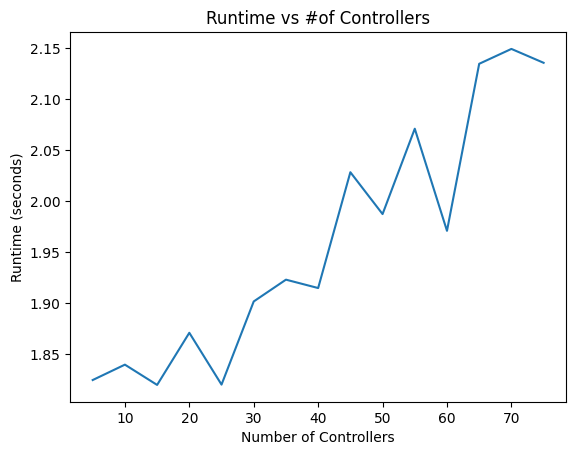

In [3]:
plt.plot(num_controllers_list, run_time)
plt.xlabel('Number of Controllers')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime vs #of Controllers')
print(run_time)